## The 5 steps of building a Machine Learning Model

There are 5 main steps in building a greate regression model

- Univariate analysis
- Multivariate analysis
- Feature selection
- Model Training and Evaluation (for all potential model candidates)
- Best Model Selection

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [ ]:
boston_data = pd.read_csv('boston.csv')

In this Notebook you will work with a [Boston housing dataset](!https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1): CRIM: per capita crime rate by town

- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per $10,000
- PTRATIO: pupil-teacher ratio by town 12. B: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In this notebook we are going to build models to predict house prices (MEDV).


In [ ]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## 1.1 Univariate analysis

In this part we will look at all the variables separately. Understand the meaning and relationship to the target <br>
There are two useful types

### 1.1.1 Histograms

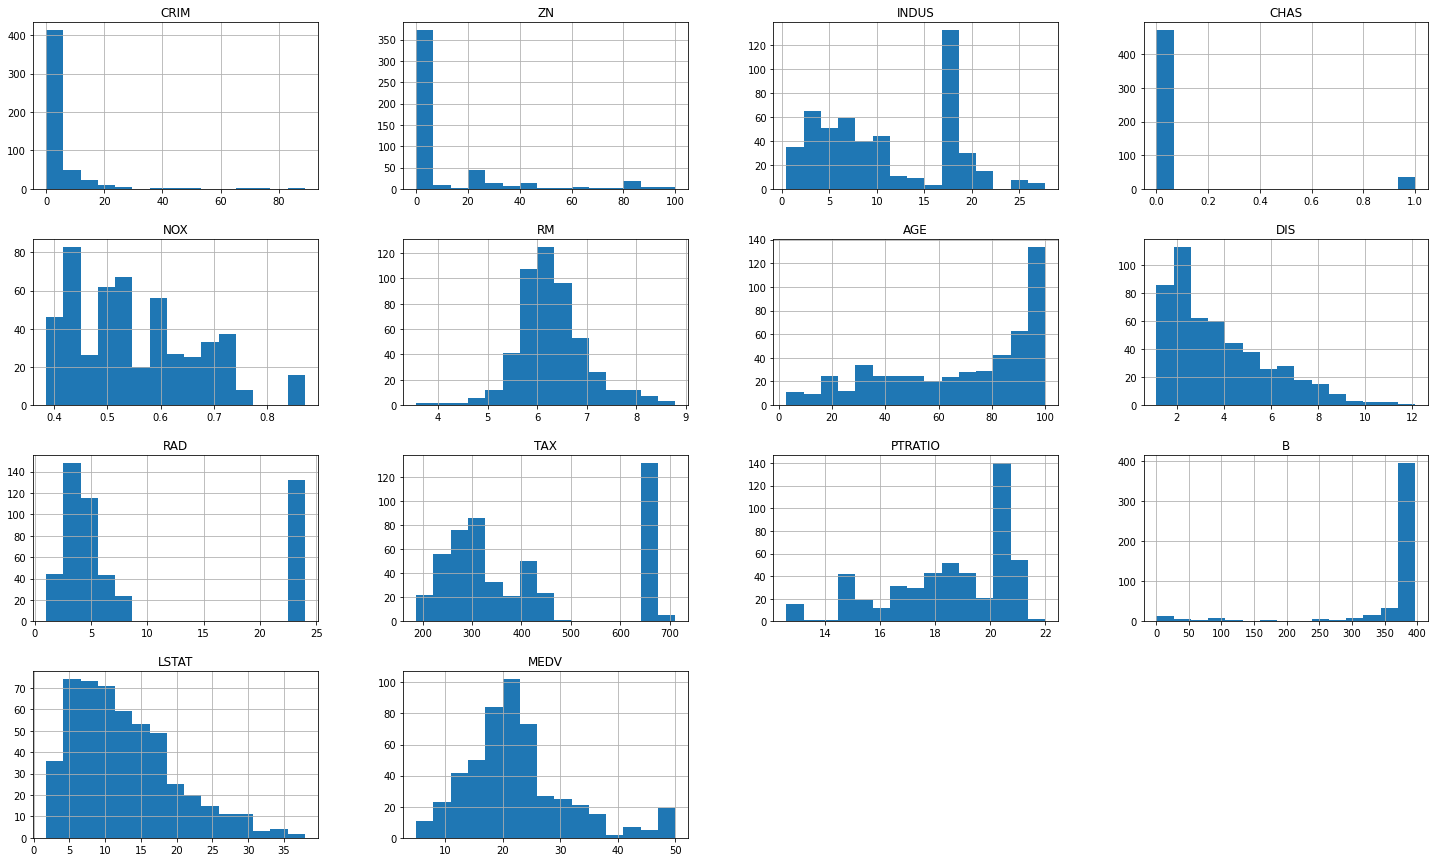

In [ ]:
boston_data.hist(bins=15, figsize=(25,15))
plt.show()

### 1.1.2 Scatter Plots

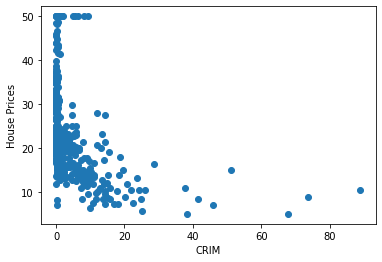

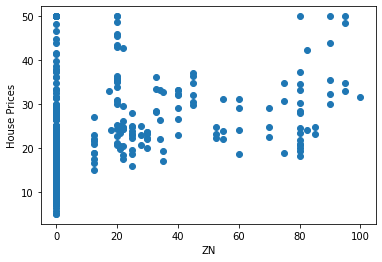

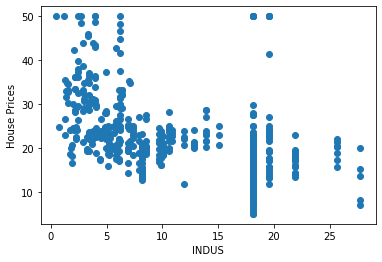

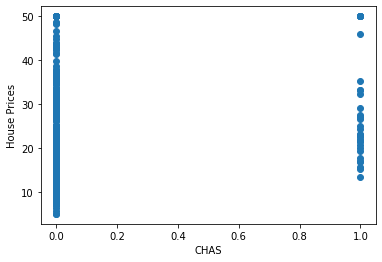

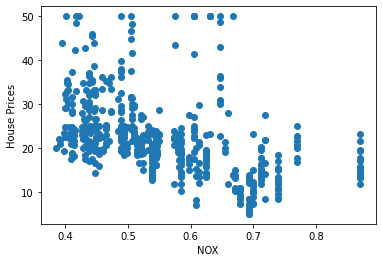

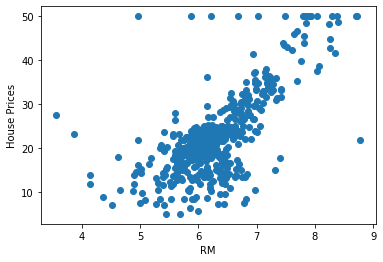

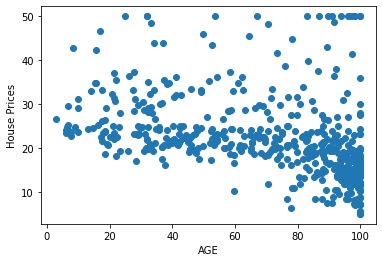

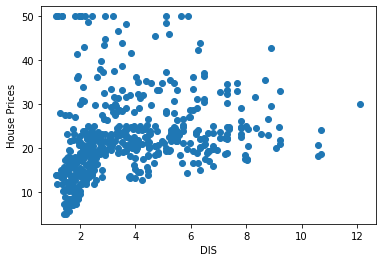

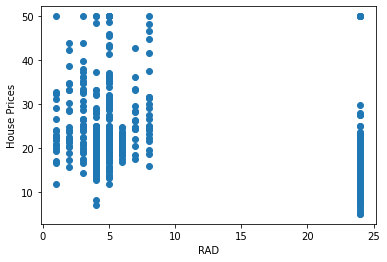

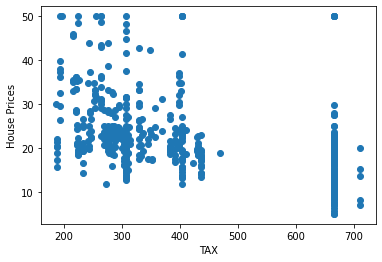

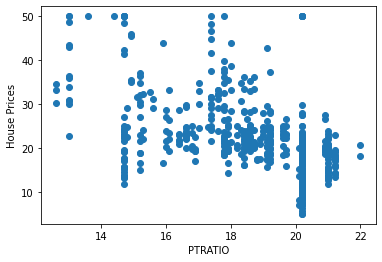

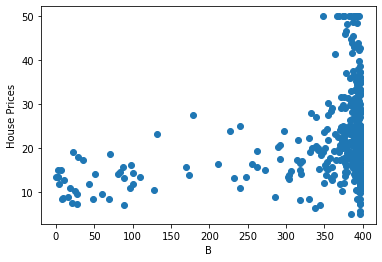

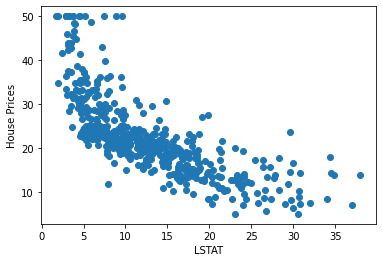

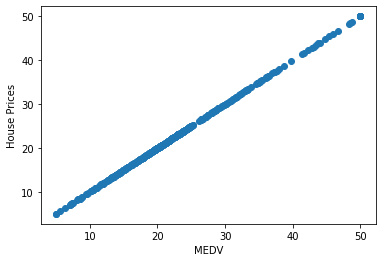

In [ ]:
for i, col in enumerate(boston_data.columns):
    plt.scatter(boston_data[col], boston_data['MEDV'])
    plt.xlabel(str(col))
    plt.ylabel('House Prices')
    plt.show()

## 1.2 Multivariate analysis

When including several variables into the regression model simultaneously it is important to consider interactions

In [ ]:
# calculate correlation between two variables
np.corrcoef(boston_data['CRIM'], boston_data['RAD'])[1,0]

0.6255051452626017

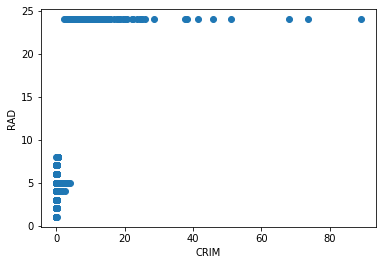

In [ ]:
plt.scatter(boston_data['CRIM'], boston_data['RAD'])
plt.xlabel('CRIM')
plt.ylabel('RAD')
plt.show()

In [ ]:
np.corrcoef(boston_data['DIS'], boston_data['LSTAT'])[1,0]

-0.4969958308636852

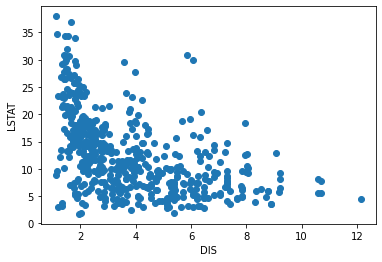

In [ ]:
plt.scatter(boston_data['DIS'], boston_data['LSTAT'])
plt.xlabel('DIS')
plt.ylabel('LSTAT')
plt.show()

In [ ]:
np.corrcoef(boston_data['RM'], boston_data['MEDV'])[1,0]

0.6953599470715396

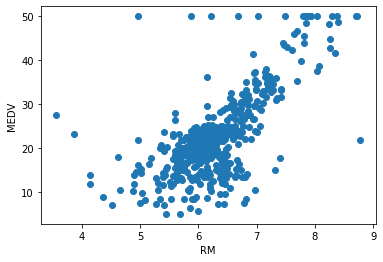

In [ ]:
plt.scatter(boston_data['RM'], boston_data['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

<AxesSubplot:>

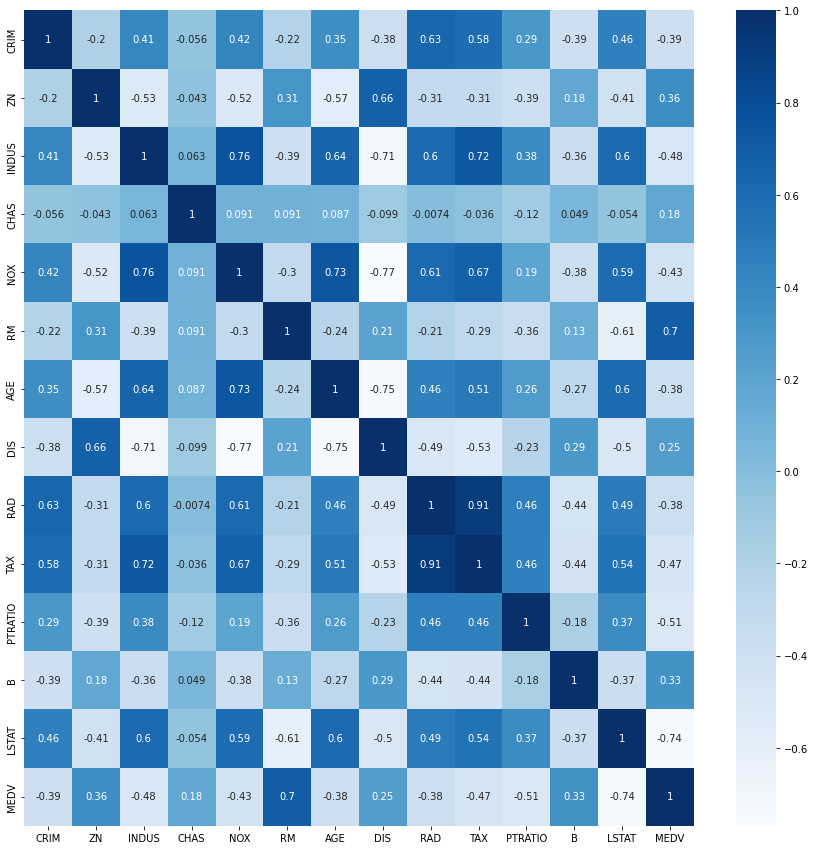

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
corr = boston_data.corr()
sns.heatmap(corr, cmap='Blues', annot=True, ax=ax)

In [ ]:
boston_data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Set 1:

    - RM
    - PTRATIO
    - LSTAT
    - NOX
   
Set 2:
    
    - RM
    - PTRATIO
    - LSTAT
    - INDUS
    
Set 3:
    
    - PTRATIO
    - LSTAT
    - INDUS
    

## 1.3 Training and evaluating candidate models

First of all, lets split the dataset into Train and Test to have some extra data that the model was not trained on. We will use this dat to check model perfomance.

In [ ]:
# use train_test_split to split x and y
X = boston_data[['RM', 'PTRATIO', 'LSTAT', 'NOX']]
y = boston_data['MEDV']

X.shape, len(y)

((506, 4), 506)

In [ ]:
# test_size 0.2 or 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, len(y_test), len(y_train)

((404, 4), (102, 4), 102, 404)

Lets now train our first candidate model!

In [ ]:
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [ ]:
X.columns

Index(['RM', 'PTRATIO', 'LSTAT', 'NOX'], dtype='object')

In [ ]:
reg1.coef_

array([ 4.95890701, -0.87125627, -0.54873009, -1.66313049])

In [ ]:
y_pred_train = reg1.predict(X_train)
y_pred_test = reg1.predict(X_test)

In [ ]:
r2_score(y_train, y_pred_train)

0.6867377605935617

In [ ]:
r2_score(y_test, y_pred_test)

0.6321094600589733

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False), mean_squared_error(y_test, y_pred_test, squared=False))


3.6789096924068754 3.3208236096576385
27.21415702957214 26.978805082769387
5.216718990857389 5.194112540441282


### ========================================================================

Set 3:
    
    - PTRATIO
    - LSTAT
    - INDUS

In [ ]:
X = boston_data[['PTRATIO', 'LSTAT', 'INDUS']]
y = boston_data['MEDV']

X.shape, len(y)

((506, 3), 506)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, len(y_test), len(y_train))

reg2 = LinearRegression()
reg2.fit(X_train, y_train)

(404, 3) (102, 3) 102 404


LinearRegression()

In [ ]:
X.columns

Index(['PTRATIO', 'LSTAT', 'INDUS'], dtype='object')

In [ ]:
reg2.coef_

array([-1.09541207, -0.85312911,  0.01753076])

In [ ]:
y_pred_train = reg2.predict(X_train)
y_pred_test = reg2.predict(X_test)

In [ ]:
r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)

(0.6010976869391359, 0.6232538193298414)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False), mean_squared_error(y_test, y_pred_test, squared=False))

4.237275762545552 4.237275762545552
34.6540017324373 27.62822271974527
5.8867649632406165 5.256255579758776


### =======================================================================================

Set 4:
    
    - TAX
    - PTRATIO
    - LSTAT
    - INDUS

In [ ]:
X = boston_data[['TAX', 'PTRATIO', 'LSTAT', 'INDUS']]
y = boston_data['MEDV']

X.shape, len(y)

((506, 4), 506)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, len(y_test), len(y_train))

reg3 = LinearRegression()
reg3.fit(X_train, y_train)

(404, 4) (102, 4) 102 404


LinearRegression()

In [ ]:
X.columns

Index(['TAX', 'PTRATIO', 'LSTAT', 'INDUS'], dtype='object')

In [ ]:
reg3.coef_

array([-9.43144351e-04, -1.08081563e+00, -8.50509447e-01,  3.02220390e-02])

In [ ]:
y_pred_train = reg3.predict(X_train)
y_pred_test = reg3.predict(X_test)

In [ ]:
r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)

(0.6012253012074738, 0.621923885734702)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print(mean_absolute_error(y_train, y_pred_train), mean_absolute_error(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train), mean_squared_error(y_test, y_pred_test))
print(mean_squared_error(y_train, y_pred_train, squared=False), mean_squared_error(y_test, y_pred_test, squared=False))

4.239961115740522 4.239961115740522
34.642915446569134 27.725751781628844
5.885823259882098 5.265524834394843


## 1.4 Best Model selection

Lets look at the results ones again. What is the Best Candidate model?

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
X = boston_data[['LSTAT', 'B', 'CRIM']]

In [ ]:
y = boston_data['MEDV']

In [ ]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [ ]:
y_pred = model.predict(X)

In [ ]:
r2_score(y_pred, y)

0.6322557334221428